# $$Rede ~Neural~ Convolucional:$$

### $$Conceito:$$


-----------------------------------------------------------------------------------------------------------------------



Redes Neurais Convolucionais (CNNs — Convolutional Neural Networks) são tipos de Redes Neurais estruturadas para receber imagens como entrada. As imagens, quando interpretadas por um computador, nada mais são do que valores armazenados em uma matriz (ou tensor). Isso dá uma vantagem às CNNs de manter as características espaciais de uma imagem, como a altura e largura, e cores.



-----------------------------------------------------------------------------------------------------------------------





### $$Tipos~de~Camadas:$$



-----------------------------------------------------------------------------------------------------------------------





**Camadas Convolucionais:** Gera uma nova matriz através da aplicação de um filtro para obter informações mais precisas sobre as imagens e descartando o desnecessário







**Kernel(Filtro)** = Matriz de numeros que multiplicado pelo Convolution Layer gera um filtro na imagem, Os filtros mais conhecidos são filtros para detecção de bordas, desfoque, nitidez, etc.



-----------------------------------------------------------------------------------------------------------------------







**Camadas Polling:** = Reduz as dimensões das imagens gerando uma nova matriz através da multiplicação das matrizes de Convolution layer VS Kernel, a forma mais comum é Max-pooling, o processo consiste em adicionar o maior valor dentro da nova matriz



-----------------------------------------------------------------------------------------------------------------------







**Camadas Flattening:** as imagens de saída da última camada são transformadas de um volume para uma camada flat 1D, ou seja, um vetor de características. A partir daqui à CNN se comporta como uma rede neural tradicional ou MLP





-----------------------------------------------------------------------------------------------------------------------



**Camadas Dense:**  São conectados por pesos e a camada de saída da rede será a previsão ou classificação.



-----------------------------------------------------------------------------------------------------------------------





### $$Parâmetros:$$



-----------------------------------------------------------------------------------------------------------------------



**Stride** = Numero de passos que o filtro caminha por vez 



**Padding** = Adiciona pixels de valor 0 (preto) ao redor da imagem, isso aumenta o tamanho da imagem de entrada, o que possibilita mais posições do filtro na imagem e aumenta o tamanho da saída


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$

## $$Criar~ uma ~rede~ neural~CNN ~~ que~ seja~ capaz~ de~ ter~ um ~bom ~desempenho$$$$nas ~classificações~ de~ imagens$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Pacotes
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import pandas as pd

# Base de dados - Cifar10 

In [46]:
#Carregar o dataset
(train_img_cifar10, train_labs_cifar10), (test_img_cifar10, test_lbs_cifar10) = datasets.cifar10.load_data()
datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

**Base de dados de imagens em formato de pixels**

In [43]:
#Dimensão dos dados

print(f'Altura = {len(train_img_cifar10[0])}')
print(f'Largura = {len(train_img_cifar10[0][0])}')
print(f'Labels Treino= {len(train_labs_cifar10)}')
print(f'Labels Teste= {len(test_lbs_cifar10)}')




Altura = 32
Largura = 32
Labels Treino= 50000
Labels Teste= 10000


**Propriedades do dataset**

# Verificar a profundidade das cores das imagens

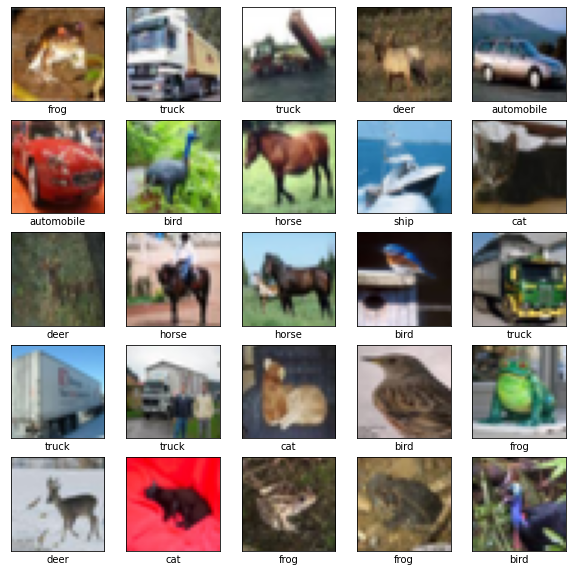

In [3]:
#Profundidade das cores das imagens
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img_cifar10[i], cmap=plt.cm.binary)
    
    plt.xlabel(class_names[train_labs_cifar10[i][0]])
plt.show()

**Todas as Imagens são coloridas portanto profundidade das cores das imagens = 3**

# Normalizar os dados

In [4]:
#Verificar o shape dos dados

print(f'Shape Treino = {train_img_cifar10.shape}')
print(f'\nShape Teste =  {test_img_cifar10.shape}')

Shape Treino = (50000, 32, 32, 3)

Shape Teste =  (10000, 32, 32, 3)


In [53]:
# Normalizar os pixels entre 0 e 1

train_img_cifar10 = train_img_cifar10.reshape(50000, 32, 32, 3)
train_img_cifar10 = train_img_cifar10 / 255.0
test_img_cifar10 = test_img_cifar10.reshape(10000, 32, 32, 3)
test_img_cifar10 = test_img_cifar10 / 255.0


print(train_img_cifar10.shape)

print(test_img_cifar10.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


**Conseguimos normalizar as imagens através da altura, largura, número de labels e a profundidade das cores das imagens, porém o formato dos dados continuam os mesmos**

# Modelo 1 - Convolucional

In [54]:
#Estrutura da rede
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Criamos 2 camadas de convolução e adicionamos 1 camada Densa na rede neural**

In [55]:
#Estrutura
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

**Sumário de todas as camadas da Rede Neural**

# Treinamento do Modelo com optimizer: 'adam'

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_adam = model.fit(train_img_cifar10, train_labs_cifar10, epochs=10, 
                    validation_data=(test_img_cifar10, test_lbs_cifar10))

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 -

In [57]:
#Acuracia de treino e teste do modelo Adam
model.evaluate(train_img_cifar10, train_labs_cifar10)#treino
model.evaluate(test_img_cifar10, test_lbs_cifar10)# teste

313/313 [==============================] - 3s 10ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026034832000732, 0.10000000149011612]

# Treinamento do Modelo com optimizer: 'sgd'

In [10]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_sgd = model.fit(train_img_cifar10, train_labs_cifar10, epochs=10, 
                    validation_data=(test_img_cifar10, test_lbs_cifar10))

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5878 - accuracy: 0.7953 - val_loss: 0.9570 - val_accuracy: 0.6973
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.5558 - accuracy: 0.8055 - val_loss: 0.9620 - val_accuracy: 0.6975
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.5418 - accuracy: 0.8108 - val_loss: 1.1120 - val_accuracy: 0.6567
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5327 - accuracy: 0.8147 - val_loss: 0.9766 - val_accuracy: 0.6983
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.5220 - accuracy: 0.8184 - val_loss: 0.9635 - val_accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5141 - accuracy: 0.8201 - val_loss: 0.9661 - val_accuracy: 0.7069
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.5091 - accuracy: 0.8222 - val_loss: 0.9835 -

In [11]:
#Acuracia de treino e teste do modelo Sgd
model.evaluate(train_img_cifar10, train_labs_cifar10)#treino
model.evaluate(test_img_cifar10, test_lbs_cifar10)# teste

313/313 [==============================] - 3s 9ms/step - loss: 0.9993 - accuracy: 0.6996


[0.9992846846580505, 0.6995999813079834]

313/313 - 3s - loss: 0.9993 - accuracy: 0.6996 - 3s/epoch - 9ms/step


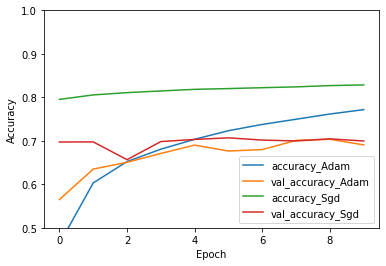

In [12]:
#Plot da acuracia X Epoch
plt.plot(history_adam.history['accuracy'], label='accuracy_Adam')
plt.plot(history_adam.history['val_accuracy'], label = 'val_accuracy_Adam')
plt.plot(history_sgd.history['accuracy'], label='accuracy_Sgd')
plt.plot(history_sgd.history['val_accuracy'], label = 'val_accuracy_Sgd')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img_cifar10, test_lbs_cifar10, verbose=2)

**Note que a métrica da Acurácia teve uma grande diferença entre os dados de treino e validação, isso pode ser indicio de overfitting**

## Modelo 2 - Rede Neural sem Convolução

In [13]:
#Arquitetura da rede neural
model = keras.Sequential([  #Criar uma sequencia de camadas
        keras.layers.Flatten(input_shape=(32, 32,3)), #Matrix de entrada: 32 x 32 = 1024 features cada imagem
        keras.layers.Dense(128, activation=tf.nn.relu), #Camada oculta: 128 neuronios -> Relu 
        keras.layers.Dense(69, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax) #Camada de saida: 10 labels -> Softmax 
    ])

**Criamos uma rede neural sem filtrar as imagens, apenas pegamos todos os pixels em seu formato original e achatamos** 

# Treinamento do Modelo com optimizer: 'Adam'

In [14]:
#Criar modelo
model.compile(optimizer=tf.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])



history1_Adam = model.fit(train_img_cifar10, train_labs_cifar10, epochs=10, 
                    validation_data=(test_img_cifar10, test_lbs_cifar10))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8701 - accuracy: 0.3229 - val_loss: 1.7790 - val_accuracy: 0.3683
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6974 - accuracy: 0.3928 - val_loss: 1.6348 - val_accuracy: 0.4153
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6216 - accuracy: 0.4184 - val_loss: 1.7053 - val_accuracy: 0.3941
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5832 - accuracy: 0.4326 - val_loss: 1.5757 - val_accuracy: 0.4382
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5498 - accuracy: 0.4430 - val_loss: 1.5725 - val_accuracy: 0.4378
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5282 - accuracy: 0.4506 - val_loss: 1.5066 - val_accuracy: 0.4606
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5090 - accuracy: 0.4614 - val_loss: 1.5496 - val_accuracy:

In [15]:
#Acuracia de treino e teste modelo Adam
model.evaluate(train_img_cifar10, train_labs_cifar10)#treino
model.evaluate(test_img_cifar10, test_lbs_cifar10)# teste


313/313 [==============================] - 1s 2ms/step - loss: 1.4887 - accuracy: 0.4678


[1.4886773824691772, 0.46779999136924744]

# Treinamento do Modelo com optimizer: 'sgd'

In [16]:
model.compile(optimizer=tf.optimizers.SGD(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])



history1_SGD = model.fit(train_img_cifar10, train_labs_cifar10, epochs=10, 
                    validation_data=(test_img_cifar10, test_lbs_cifar10))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3884 - accuracy: 0.5040 - val_loss: 1.4506 - val_accuracy: 0.4820
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3789 - accuracy: 0.5099 - val_loss: 1.4482 - val_accuracy: 0.4852
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3738 - accuracy: 0.5125 - val_loss: 1.4509 - val_accuracy: 0.4886
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3707 - accuracy: 0.5102 - val_loss: 1.4519 - val_accuracy: 0.4835
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3655 - accuracy: 0.5130 - val_loss: 1.4500 - val_accuracy: 0.4883
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3620 - accuracy: 0.5146 - val_loss: 1.4665 - val_accuracy: 0.4835
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3597 - accuracy: 0.5141 - val_loss: 1.4620 - val_accuracy:

In [17]:
#Acuracia de treino e teste modelo SGD
model.evaluate(train_img_cifar10, train_labs_cifar10)#treino
model.evaluate(test_img_cifar10, test_lbs_cifar10)# teste

313/313 [==============================] - 0s 2ms/step - loss: 1.4491 - accuracy: 0.4865


[1.4491355419158936, 0.48649999499320984]

313/313 - 0s - loss: 1.4491 - accuracy: 0.4865 - 401ms/epoch - 1ms/step


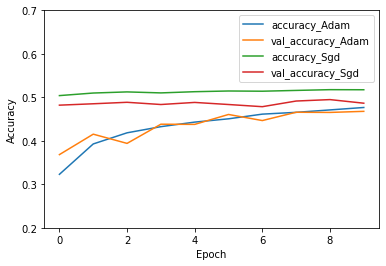

In [18]:
#Plot da acuracia X Epoch
plt.plot(history1_Adam.history['accuracy'], label='accuracy_Adam')
plt.plot(history1_Adam.history['val_accuracy'], label = 'val_accuracy_Adam')
plt.plot(history1_SGD.history['accuracy'], label='accuracy_Sgd')
plt.plot(history1_SGD.history['val_accuracy'], label = 'val_accuracy_Sgd')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 0.7])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_img_cifar10, test_lbs_cifar10, verbose=2)

**Todos os modelos chegaram ao mesmo valor de acurácia, porém o valor ficou muito abaixo do modelo de rede neural convolucional**

# Base de dados - Fashion_mnist 

In [73]:
#Carregando os dados
dados  =keras.datasets.fashion_mnist
(train_img_famnist,train_labs_famnist),(test_img_famnist,test_labs_famnist) = dados.load_data()
dados.load_data()[0][0][2][27]


array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 18, 42, 57, 56, 32,
        8,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0], dtype=uint8)

**Base de dados de imagens em formato de pixels**

In [59]:
#Dimensão dos dados

print(f'Altura = {len(train_img_famnist[0])}')
print(f'Largura = {len(train_img_famnist[0][0])}')
print(f'Labels Treino= {len(train_labs_famnist)}')
print(f'Labels Teste= {len(test_labs_famnist)}')

Altura = 28
Largura = 28
Labels Treino= 60000
Labels Teste= 10000


**Propiedades do dataset**

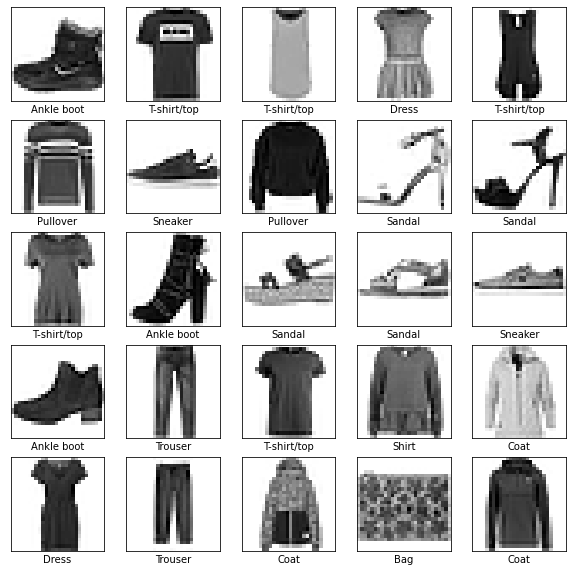

In [20]:
#Verificar a profundidade das cores das imagens

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img_famnist[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labs_famnist[i]])
plt.show()


**Todas as Imagens estão em preto e branco(escala de cinza), portanto profundidade das cores das imagens = 1**

In [21]:
# Normalizar os pixels entre 0 e 1
train_img_famnist = train_img_famnist.reshape(60000, 28, 28, 1)
train_img_famnist = train_img_famnist / 255.0
test_img_famnist = test_img_famnist.reshape(10000, 28, 28, 1)
test_img_famnist = test_img_famnist / 255.0

# Modelo Convolucional

In [22]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Flatten(), #Quantidades de neoronios de entrada
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

**Criamos 2 camadas de convolução e adicionamos 1 camada Densa na rede neural**

In [23]:
#Sumario 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

**Sumário de todas as camadas da Rede Neural**

# Treinamento do Modelo com optimizer: 'adam'

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2_adam = model.fit(train_img_famnist, train_labs_famnist, epochs=10, 
                    validation_data=(test_img_famnist, test_labs_famnist))


Epoch 1/10


C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 48s 25ms/step - loss: 0.4366 - accuracy: 0.8404 - val_loss: 0.3518 - val_accuracy: 0.8754
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2853 - accuracy: 0.8949 - val_loss: 0.2862 - val_accuracy: 0.8940
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2412 - accuracy: 0.9102 - val_loss: 0.2664 - val_accuracy: 0.8993
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2078 - accuracy: 0.9228 - val_loss: 0.2820 - val_accuracy: 0.8992
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1802 - accuracy: 0.9316 - val_loss: 0.2566 - val_accuracy: 0.9060
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1595 - accuracy: 0.9389 - val_loss: 0.2693 - val_accuracy: 0.9087
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1372 - accuracy: 0.9486 - val_loss: 0.2906 - val_accura

In [25]:
#Acuracia de treino e teste modelo Adam
model.evaluate(train_img_famnist,train_labs_famnist)#treino
model.evaluate(test_img_famnist,test_labs_famnist)# teste


313/313 [==============================] - 2s 7ms/step - loss: 0.3277 - accuracy: 0.9116


[0.3277416527271271, 0.9115999937057495]

# Treinamento do Modelo com optimizer: 'Sgd'

In [26]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2_sgd = model.fit(train_img_famnist, train_labs_famnist, epochs=10, 
                    validation_data=(test_img_famnist, test_labs_famnist))

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0546 - accuracy: 0.9812 - val_loss: 0.3185 - val_accuracy: 0.9170
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0466 - accuracy: 0.9842 - val_loss: 0.3314 - val_accuracy: 0.9167
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0433 - accuracy: 0.9850 - val_loss: 0.3438 - val_accuracy: 0.9190
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0411 - accuracy: 0.9857 - val_loss: 0.3536 - val_accuracy: 0.9179
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0394 - accuracy: 0.9863 - val_loss: 0.3700 - val_accuracy: 0.9177
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0378 - accuracy: 0.9868 - val_loss: 0.3742 - val_accuracy: 0.9162
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0363 - accuracy: 0.9875 - val_loss: 0.3748 -

In [27]:
#Acuracia de treino e teste modelo Sgd
model.evaluate(train_img_famnist,train_labs_famnist)#treino
model.evaluate(test_img_famnist,test_labs_famnist)# teste


313/313 [==============================] - 2s 7ms/step - loss: 0.4016 - accuracy: 0.9169


[0.4016095995903015, 0.9168999791145325]

313/313 - 2s - loss: 0.4016 - accuracy: 0.9169 - 2s/epoch - 7ms/step


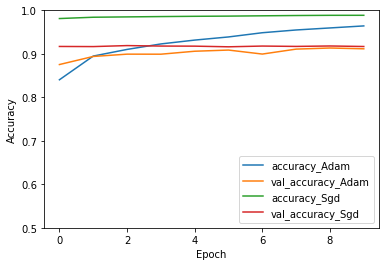

In [28]:
plt.plot(history2_adam.history['accuracy'], label='accuracy_Adam')
plt.plot(history2_adam.history['val_accuracy'], label = 'val_accuracy_Adam')
plt.plot(history2_sgd.history['accuracy'], label='accuracy_Sgd')
plt.plot(history2_sgd.history['val_accuracy'], label = 'val_accuracy_Sgd')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img_famnist,test_labs_famnist, verbose=2)

**A acurácia dos dados de treino e teste tiveram um bom desempenho e ficaram muito próximas**

## Rede Neural sem Convolução

In [29]:
#Arquitetura da rede neural
model = keras.Sequential([  #Criar uma sequencia de camadas
        keras.layers.Flatten(input_shape=(28, 28)), #Matrix de entrada: 28 x 28 = 784 features cada imagem
        keras.layers.Dense(128, activation=tf.nn.relu), #Camada oculta: 128 neuronios -> Relu 
        keras.layers.Dense(69, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax) #Camada de saida: 10 labels -> Softmax 
    ])

**Criamos uma rede neural sem filtrar as imagens, apenas pegamos todos os pixels em seu formato original e achatamos**

# Treinamento do Modelo com optimizer: 'adam'

In [30]:
#Criar modelo
model.compile(optimizer=tf.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


history3_Adam = model.fit(train_img_famnist, train_labs_famnist, epochs=10, 
                    validation_data=(test_img_famnist, test_labs_famnist))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4938 - accuracy: 0.8242 - val_loss: 0.4131 - val_accuracy: 0.8514
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3651 - accuracy: 0.8666 - val_loss: 0.4222 - val_accuracy: 0.8482
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3306 - accuracy: 0.8789 - val_loss: 0.3567 - val_accuracy: 0.8737
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3079 - accuracy: 0.8869 - val_loss: 0.3468 - val_accuracy: 0.8719
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2909 - accuracy: 0.8910 - val_loss: 0.3422 - val_accuracy: 0.8779
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2783 - accuracy: 0.8965 - val_loss: 0.3774 - val_accuracy: 0.8669
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9007 - val_loss: 0.3394 - val_accuracy:

In [31]:
#Acuracia de treino e teste modelo Adam
model.evaluate(train_img_famnist, train_labs_famnist)#treino
model.evaluate(test_img_famnist, test_labs_famnist)# teste


313/313 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8823


[0.3455100655555725, 0.8823000192642212]

# Treinamento do Modelo com optimizer: 'Sgd'

In [32]:
model.compile(optimizer=tf.optimizers.SGD(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


history3_Sgd = model.fit(train_img_famnist, train_labs_famnist, epochs=10, 
                    validation_data=(test_img_famnist, test_labs_famnist))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1924 - accuracy: 0.9273 - val_loss: 0.3170 - val_accuracy: 0.8940
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1862 - accuracy: 0.9302 - val_loss: 0.3183 - val_accuracy: 0.8921
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1831 - accuracy: 0.9311 - val_loss: 0.3188 - val_accuracy: 0.8926
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1809 - accuracy: 0.9314 - val_loss: 0.3201 - val_accuracy: 0.8923
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1791 - accuracy: 0.9326 - val_loss: 0.3208 - val_accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1776 - accuracy: 0.9330 - val_loss: 0.3218 - val_accuracy: 0.8935
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1760 - accuracy: 0.9335 - val_loss: 0.3251 - val_accuracy:

In [33]:
#Acuracia de treino e teste modelo Sgd
model.evaluate(train_img_famnist, train_labs_famnist)#treino
model.evaluate(test_img_famnist, test_labs_famnist)# teste

313/313 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8925


[0.32284605503082275, 0.8924999833106995]

313/313 - 0s - loss: 0.3228 - accuracy: 0.8925 - 356ms/epoch - 1ms/step


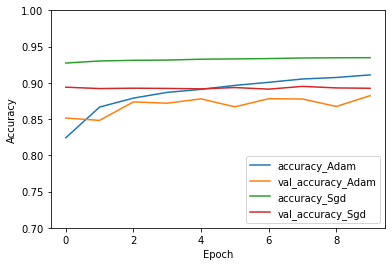

In [34]:
#Plot da acuracia X Epoch
plt.plot(history3_Adam.history['accuracy'], label='accuracy_Adam')
plt.plot(history3_Adam.history['val_accuracy'], label = 'val_accuracy_Adam')
plt.plot(history3_Sgd.history['accuracy'], label='accuracy_Sgd')
plt.plot(history3_Sgd.history['val_accuracy'], label = 'val_accuracy_Sgd')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img_famnist, test_labs_famnist, verbose=2)

**As métricas de acurácia do modelo de treino e validação teve um desempenho mediano em relação ao modelo de convolução**

# Conclusão: 

**Podemos observar que para classificação de imagens usar a rede neural convolucional faz uma enorme diferença quando usamos apenas uma rede neural simples, poderíamos mudar vários parâmetros, adicionar camadas, trocar valores para conseguir um melhor desempenho**